### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 374_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,...,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000,8773.000000
mean,0.031708,0.145464,0.381614,0.650378,1.795807,15.243062,2.215826,1.137983,1.056597,1.004727,...,1.598527,1.838509,1.710873,1.754421,0.879812,1.328568,1.819262,2.058433,1.925702,53.612151
std,0.007750,0.011785,0.016661,0.026559,0.039058,7.421068,0.906223,0.168277,0.030077,0.002027,...,0.045412,0.018300,0.021347,0.091129,0.062807,0.034611,0.017331,0.004003,0.044607,16.051297
min,0.008962,0.087878,0.301358,0.611732,1.754086,1.977603,1.090976,0.940566,1.034803,0.978394,...,1.414232,1.792268,1.617974,1.630196,0.270951,1.183607,1.767053,2.048402,1.811077,30.600000
25%,0.025531,0.136733,0.374960,0.636765,1.776131,10.946105,1.696180,1.069930,1.040943,1.004317,...,1.571329,1.825089,1.697752,1.705724,0.853749,1.305928,1.809861,2.056177,1.907269,43.600000
50%,0.032465,0.148869,0.382038,0.642687,1.779511,12.182975,1.786717,1.076579,1.044298,1.004935,...,1.611366,1.836280,1.710659,1.724806,0.888886,1.337894,1.819944,2.057861,1.945090,46.500000
75%,0.036876,0.153117,0.387823,0.653043,1.793186,17.429655,2.368250,1.119164,1.059330,1.005656,...,1.633231,1.847809,1.724662,1.751726,0.916489,1.354172,1.828997,2.059630,1.950576,59.800000
max,0.070449,0.189338,0.484040,0.805343,1.923565,69.485645,6.251936,2.045822,1.196449,1.012682,...,1.680068,1.904395,1.766895,2.016529,0.999767,1.401275,1.882625,2.073368,2.001207,97.700000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

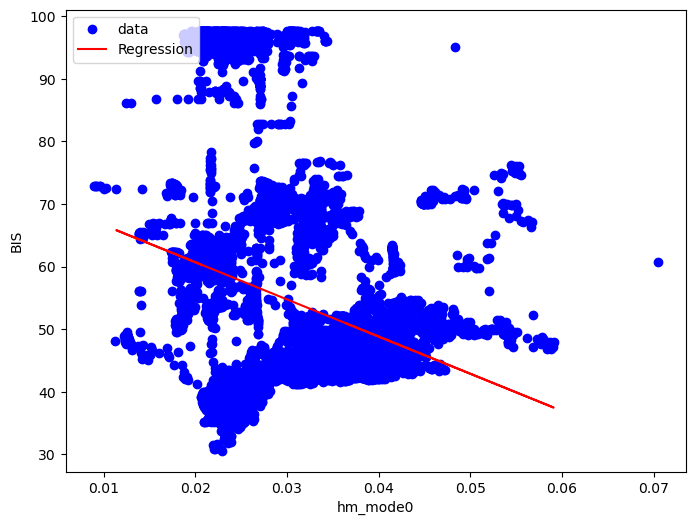

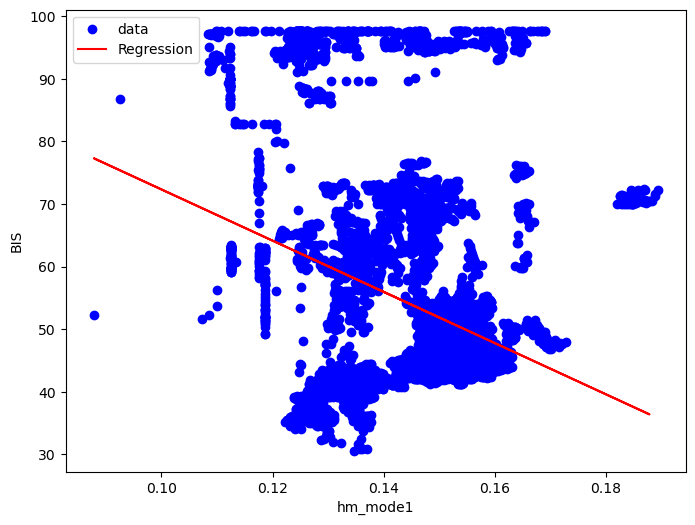

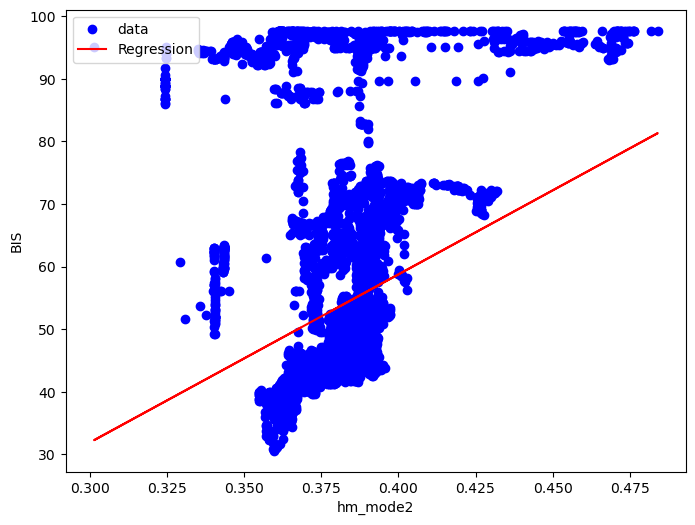

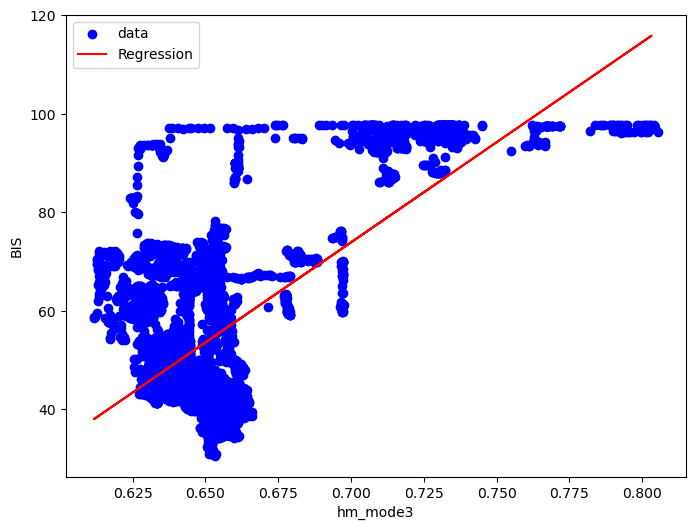

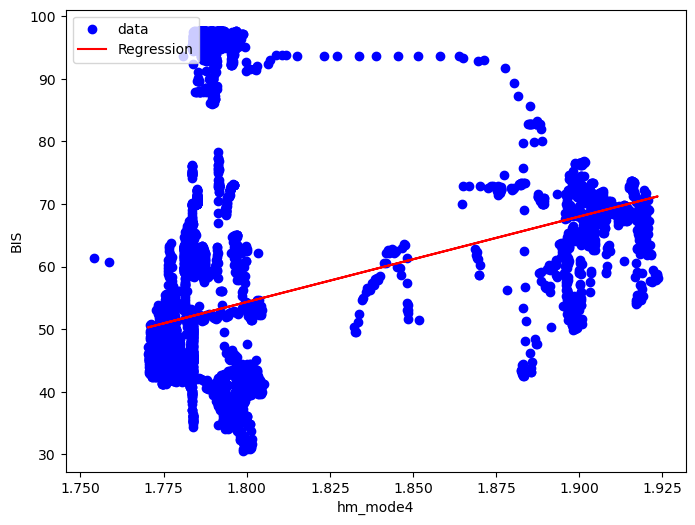

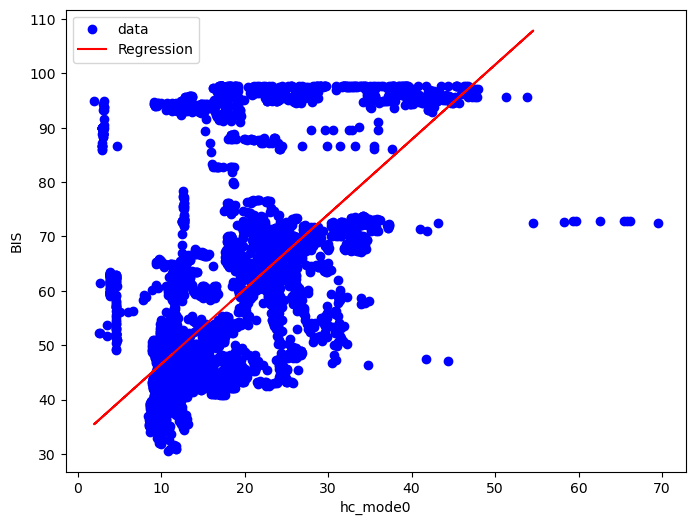

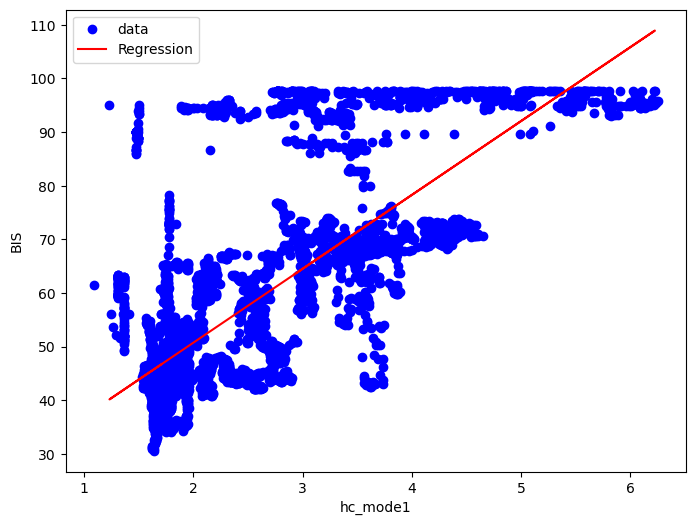

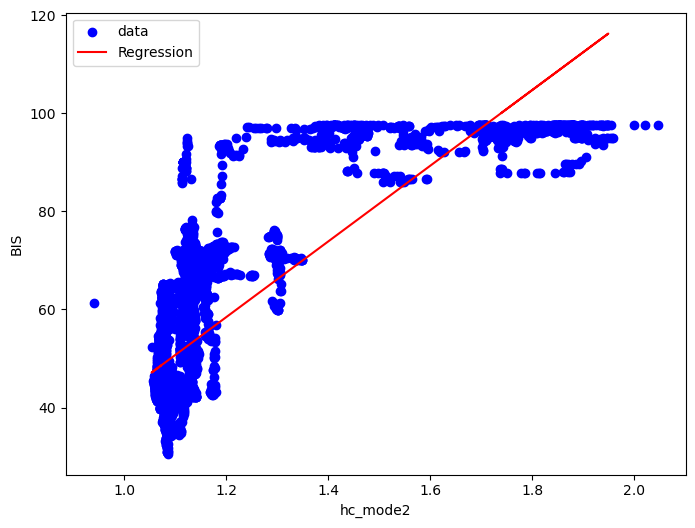

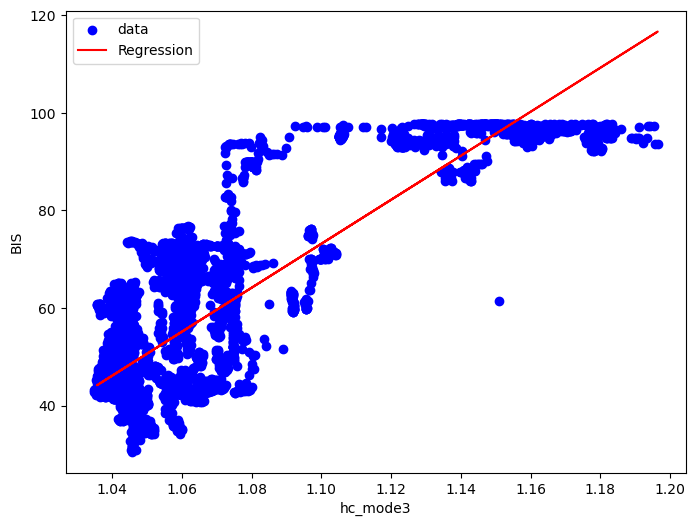

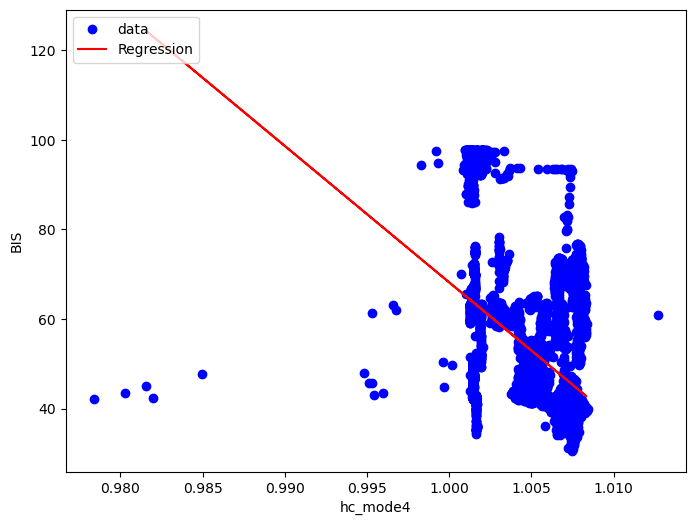

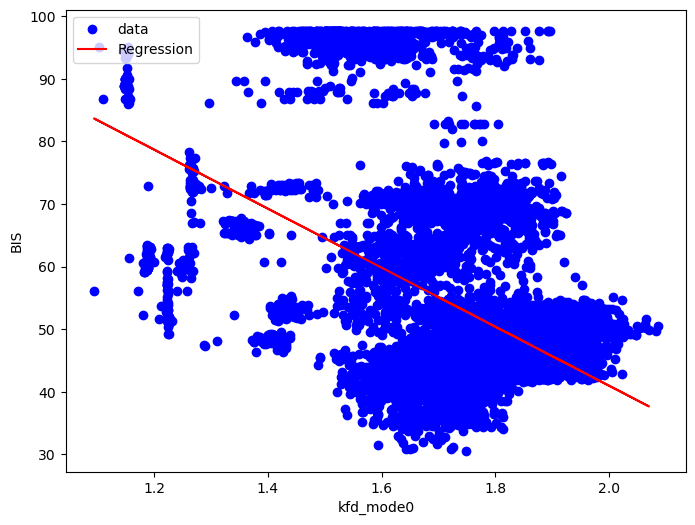

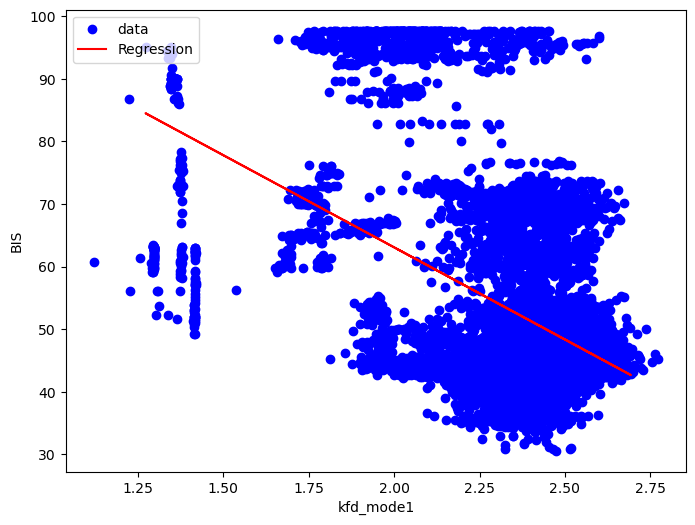

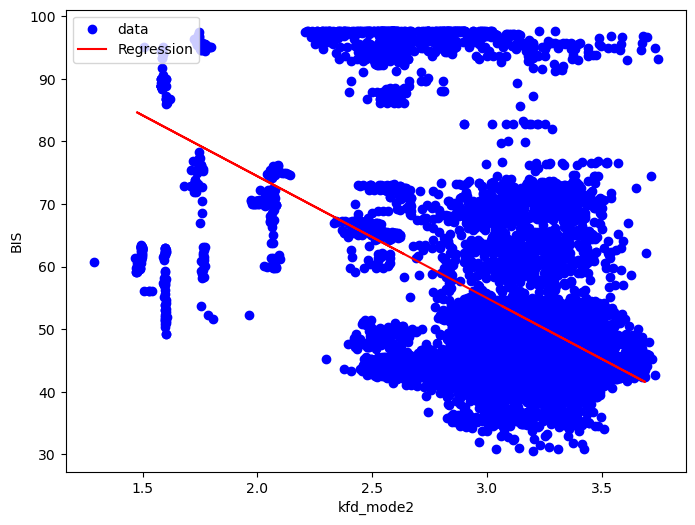

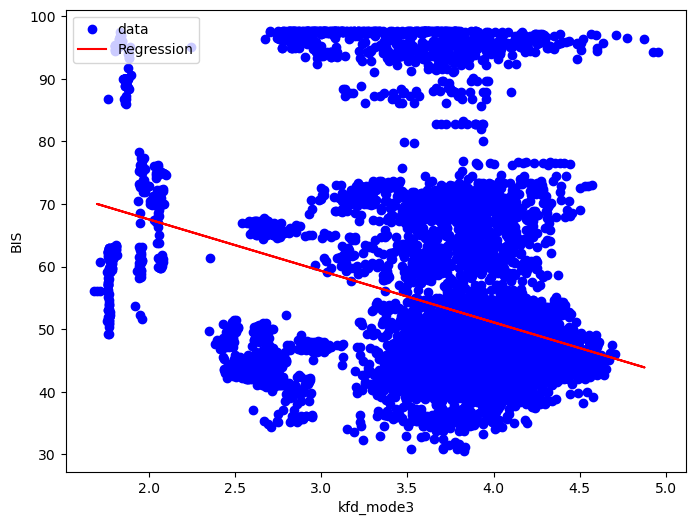

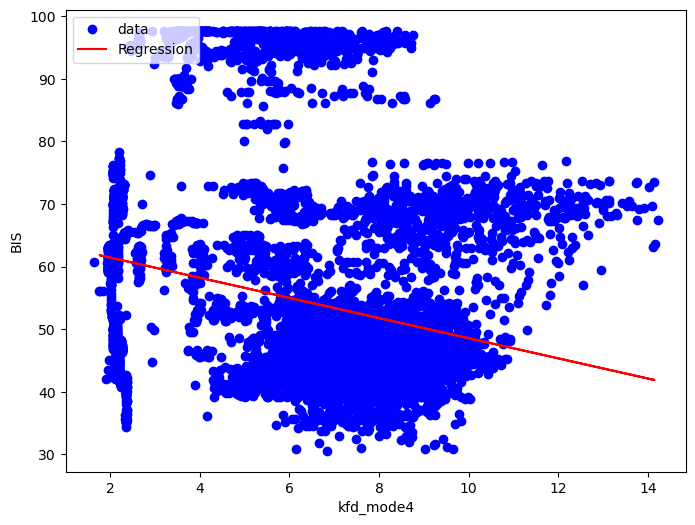

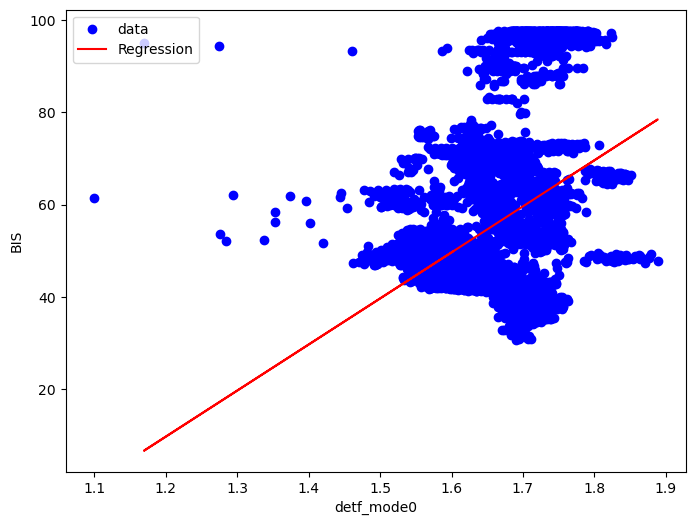

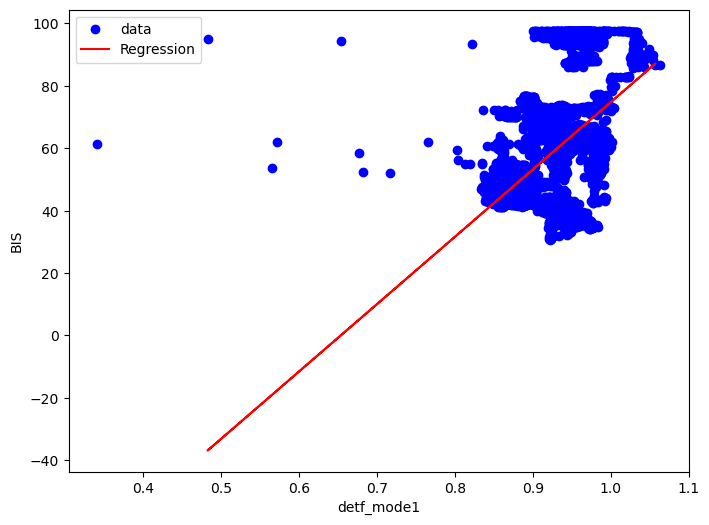

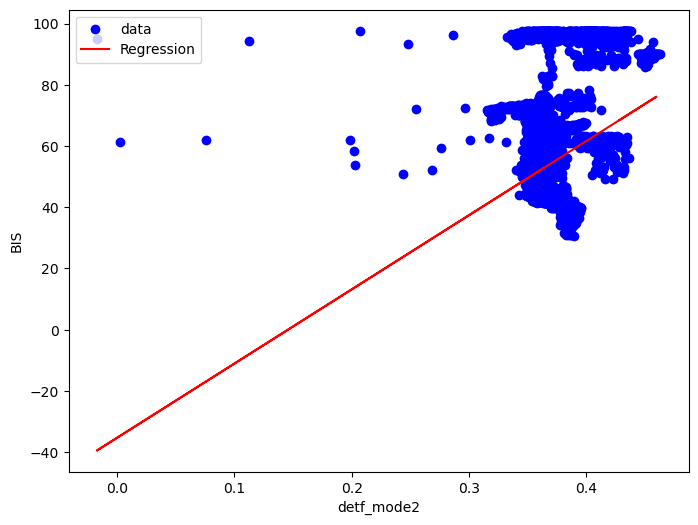

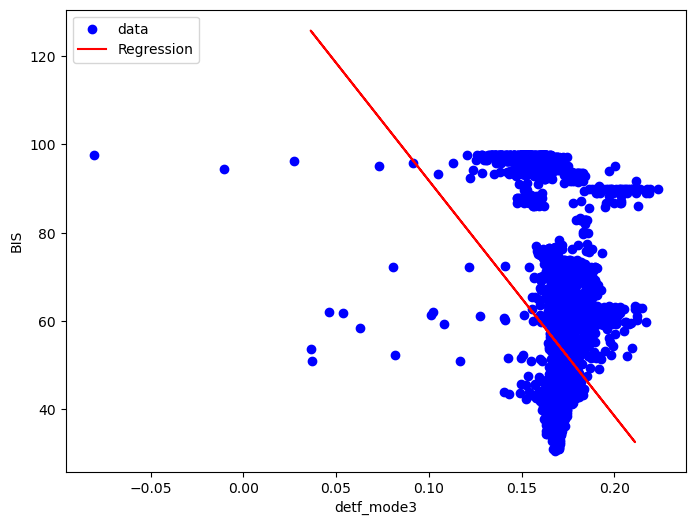

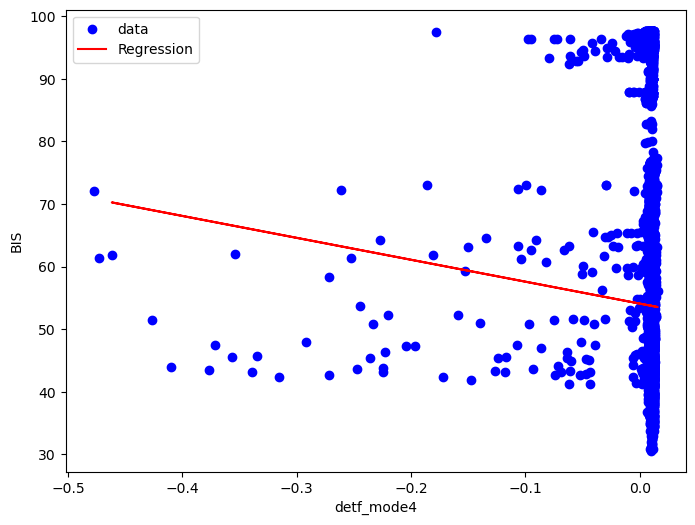

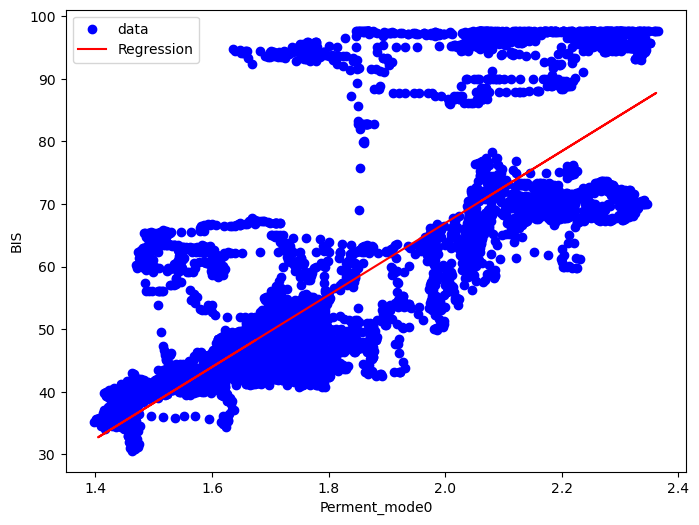

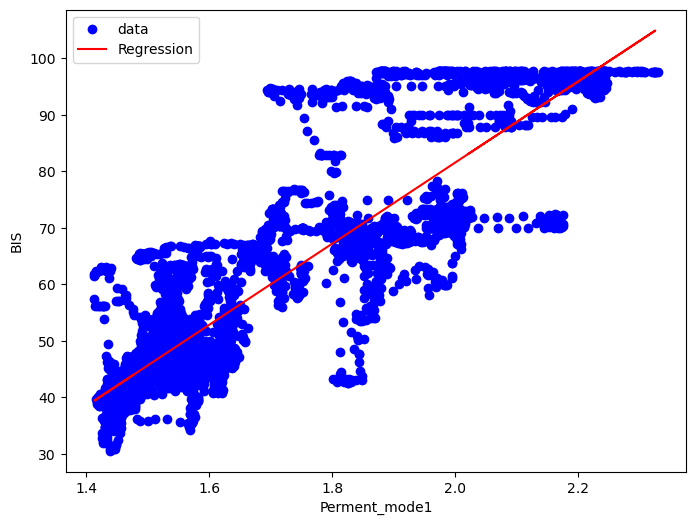

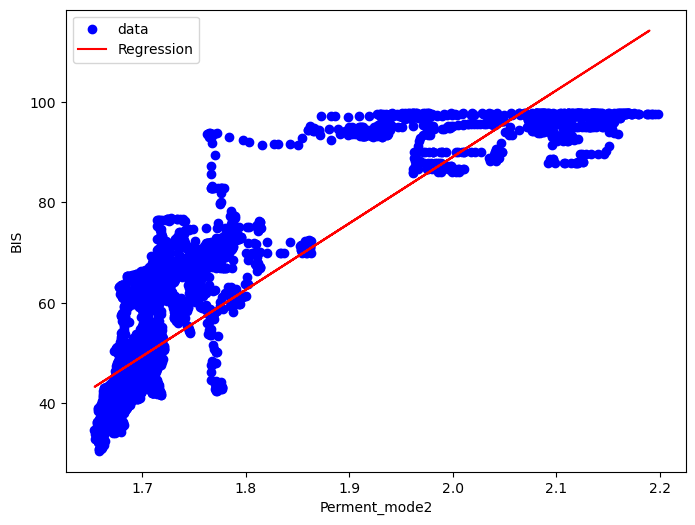

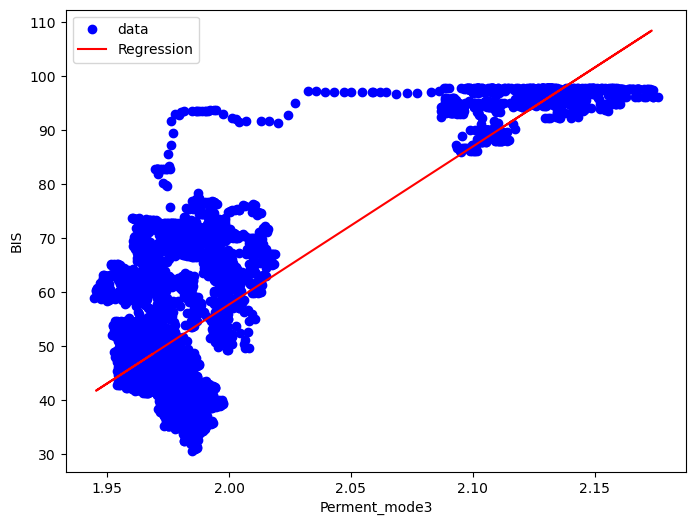

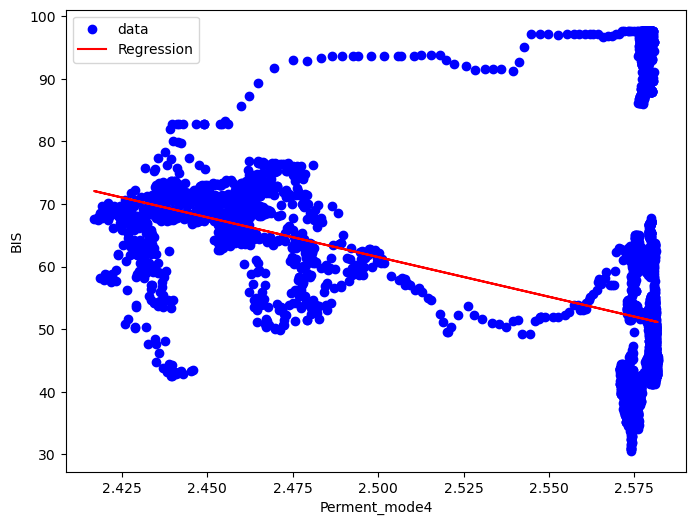

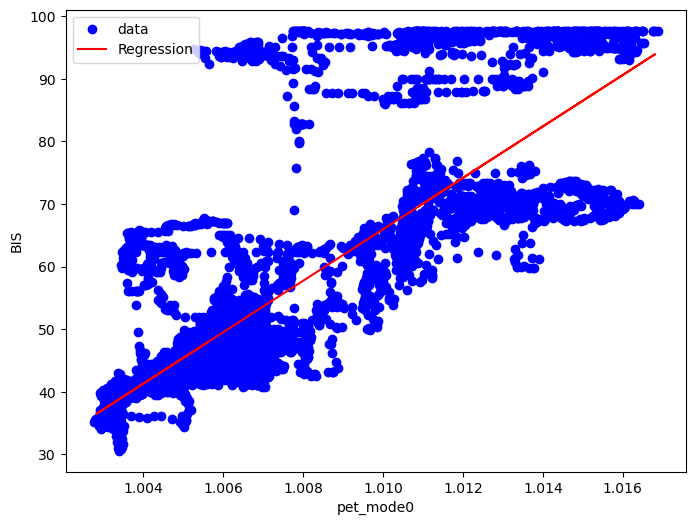

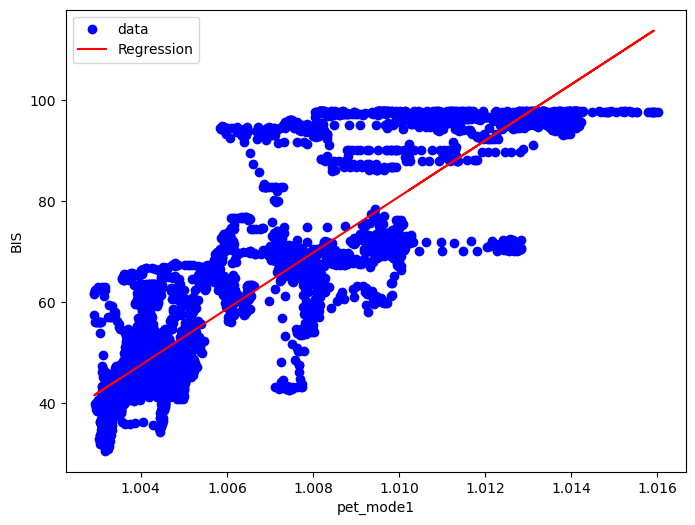

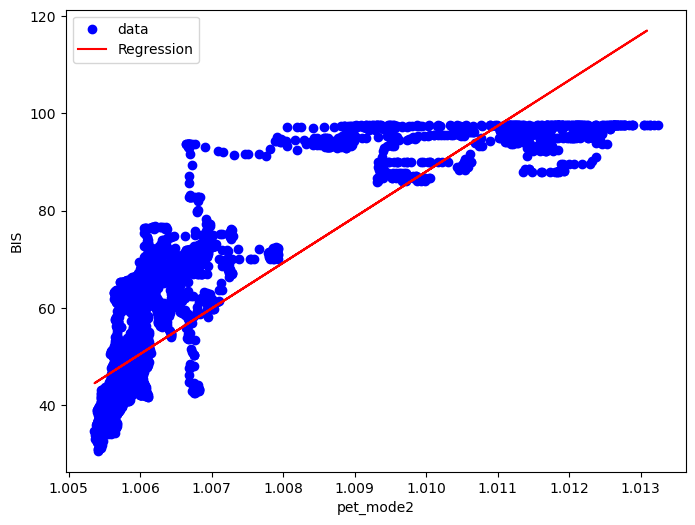

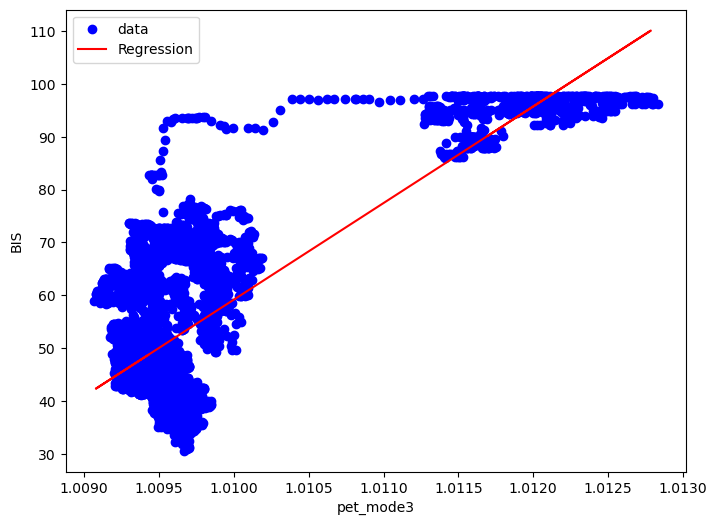

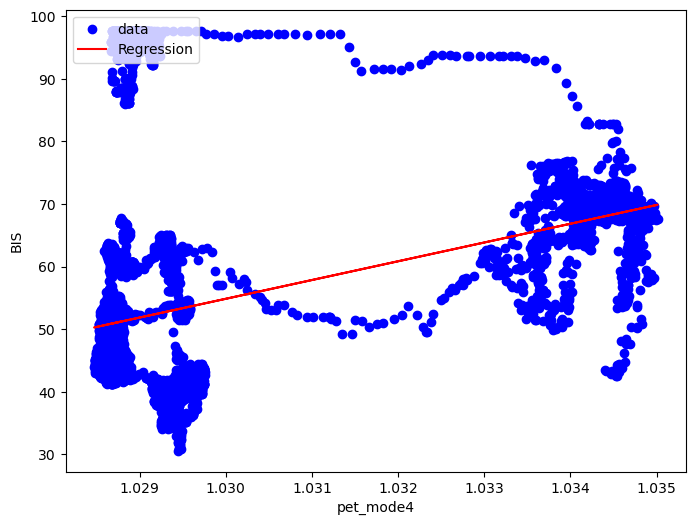

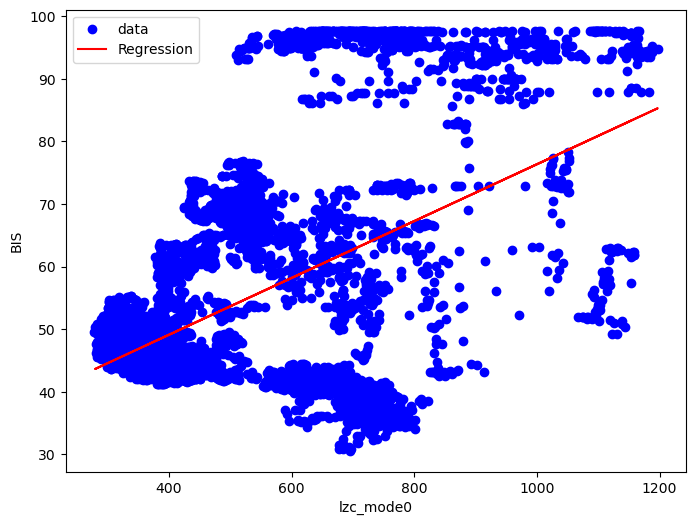

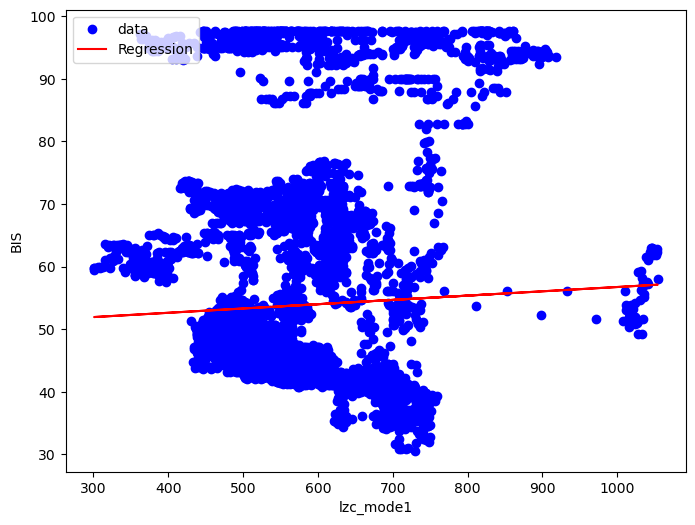

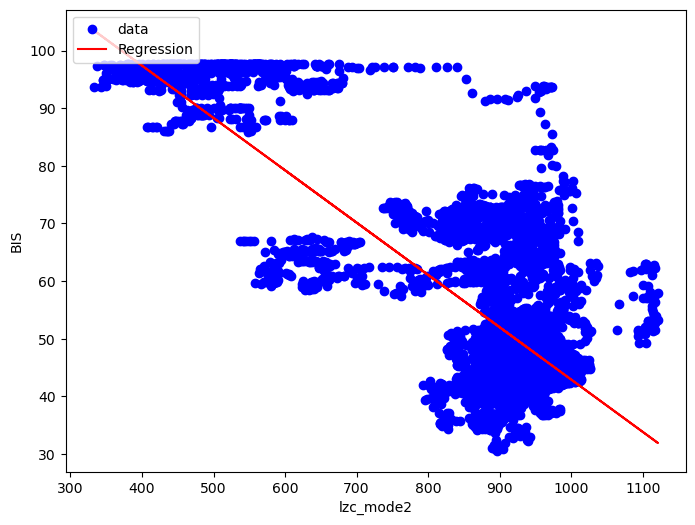

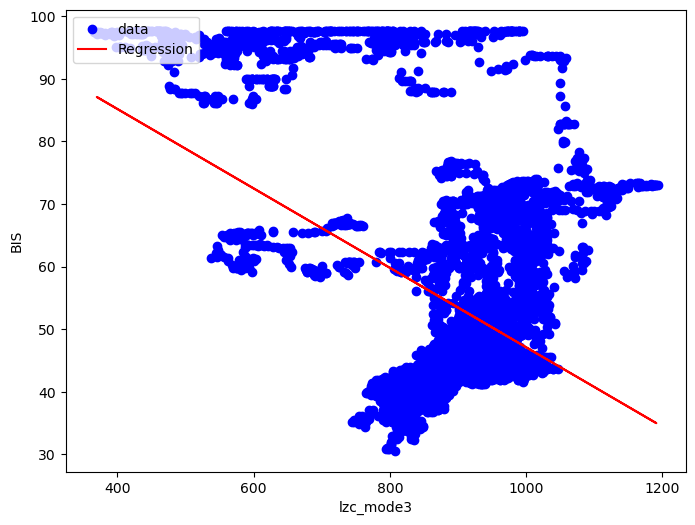

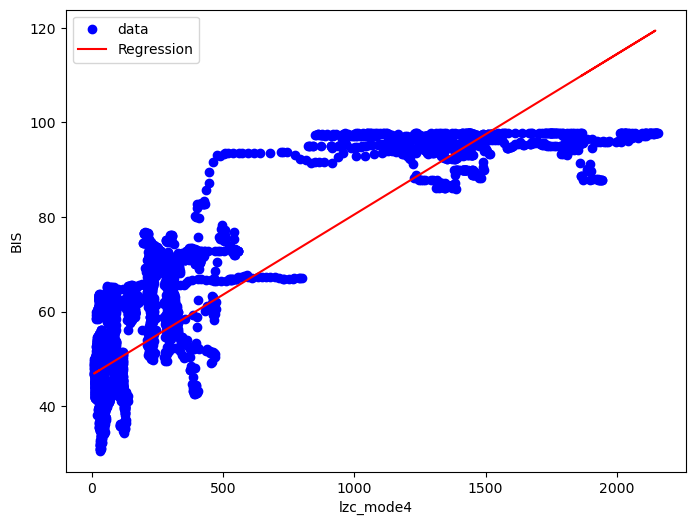

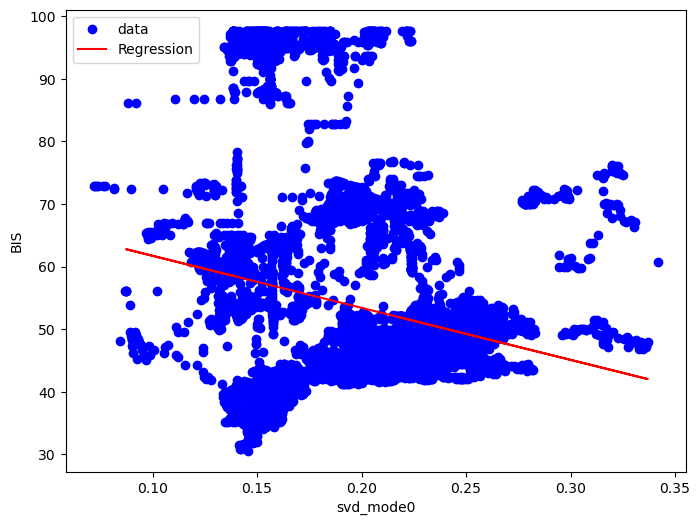

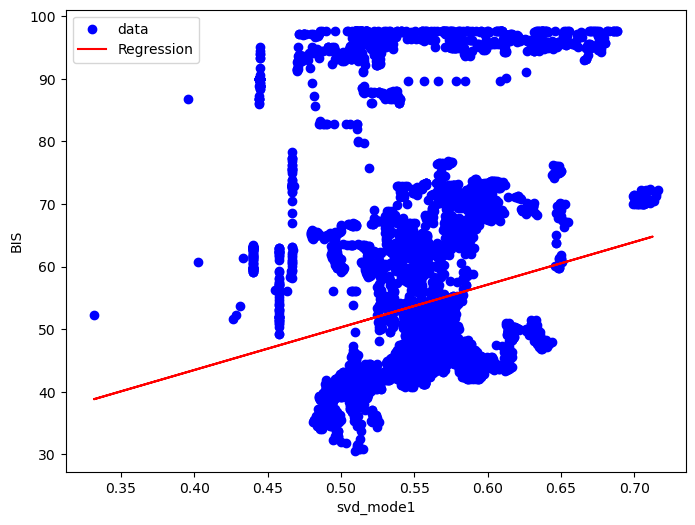

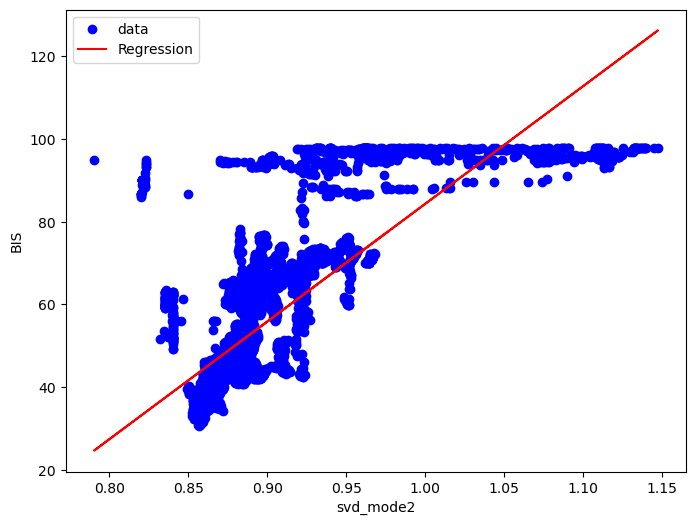

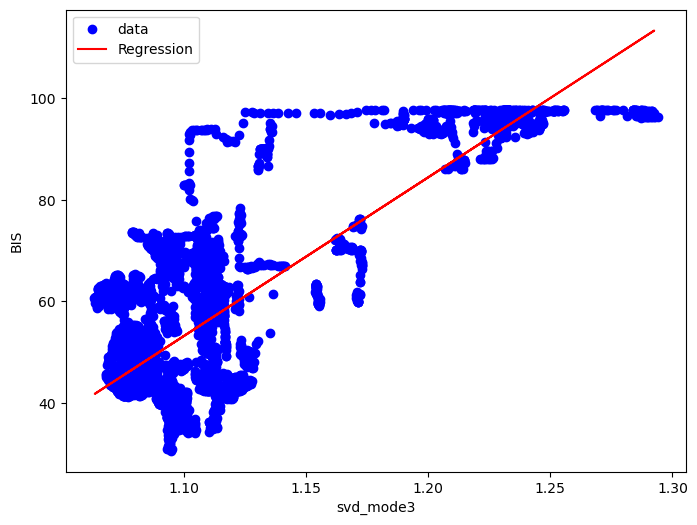

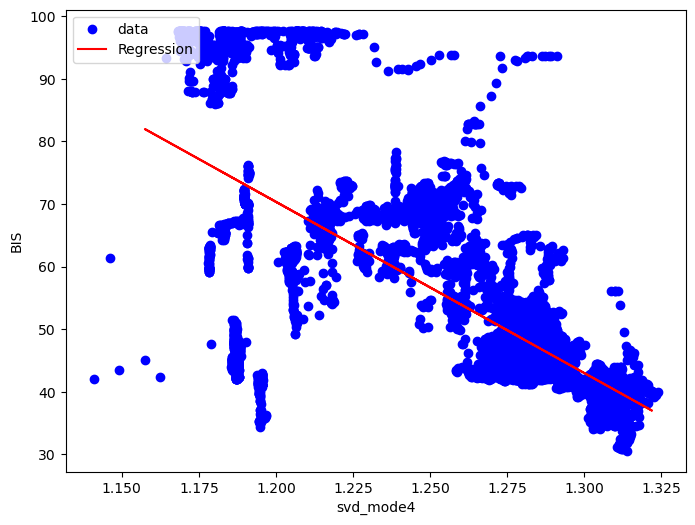

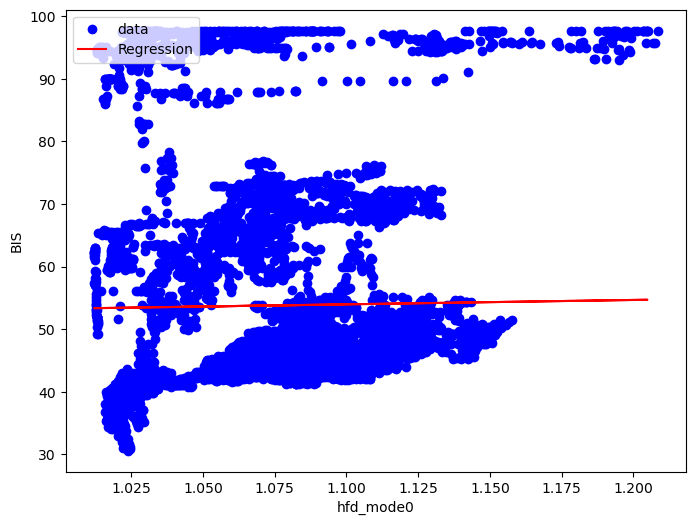

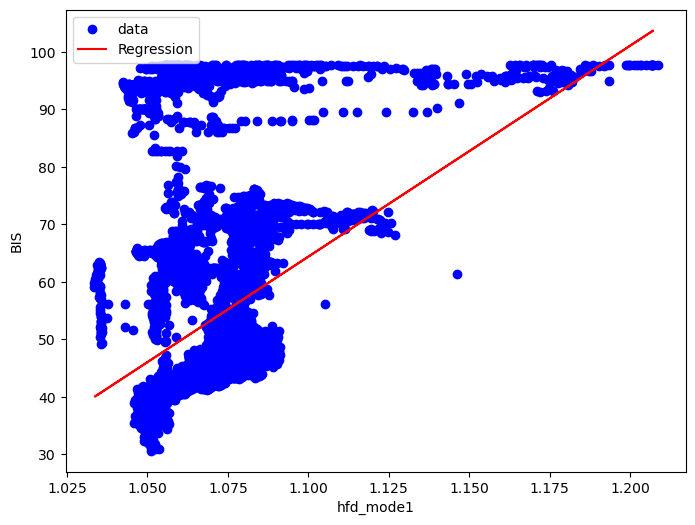

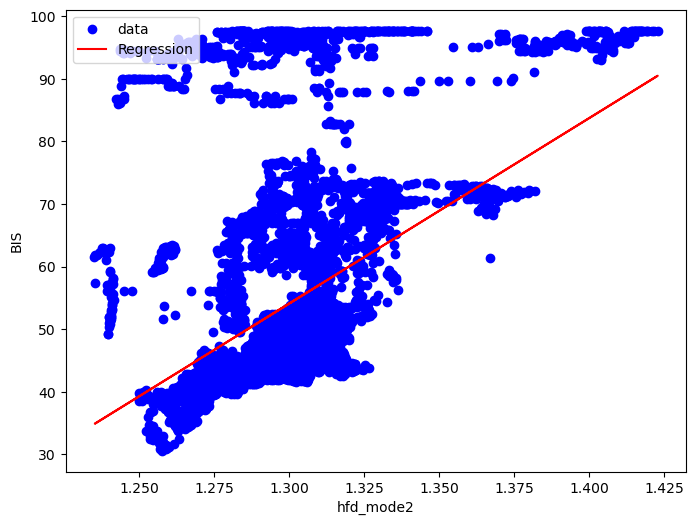

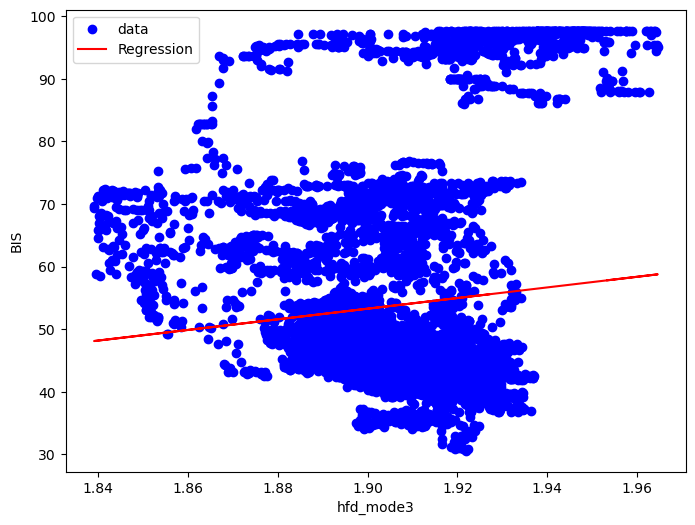

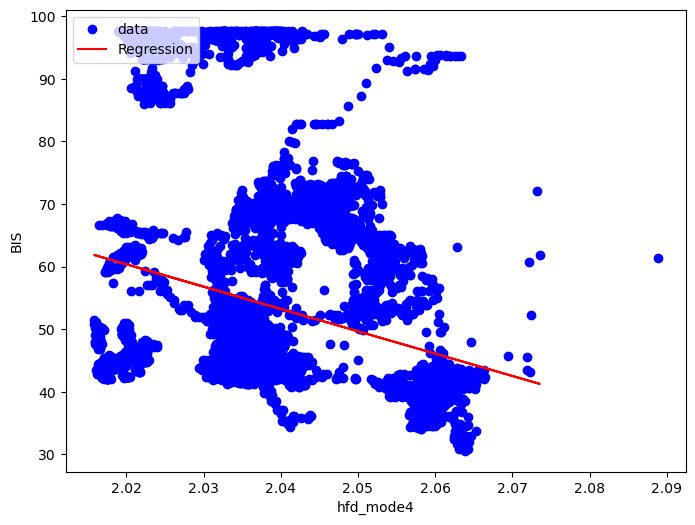

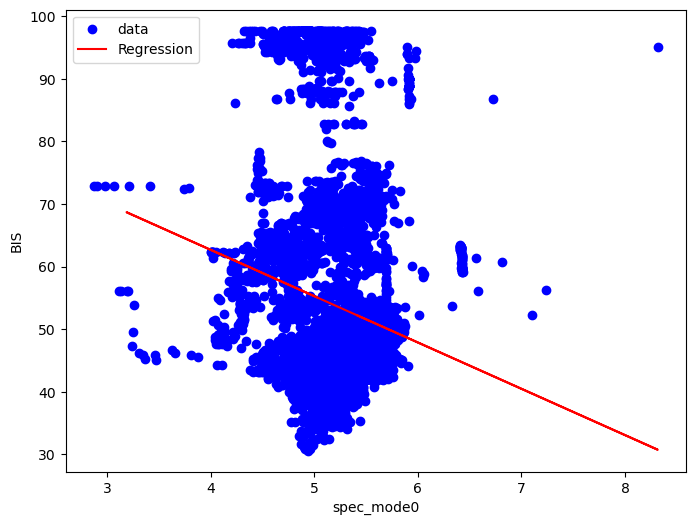

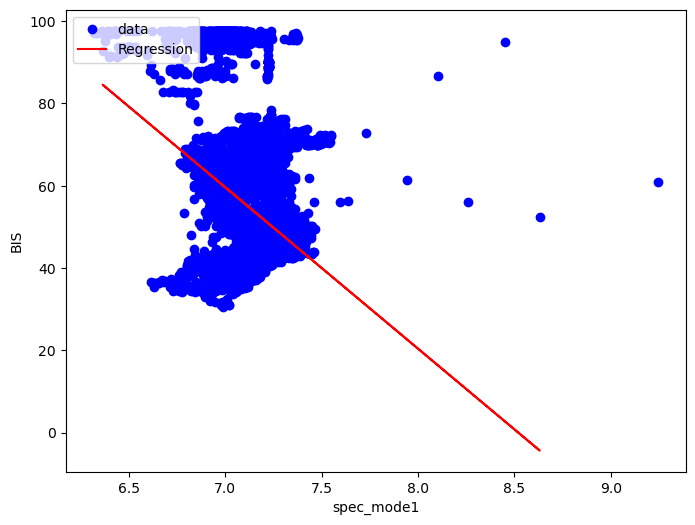

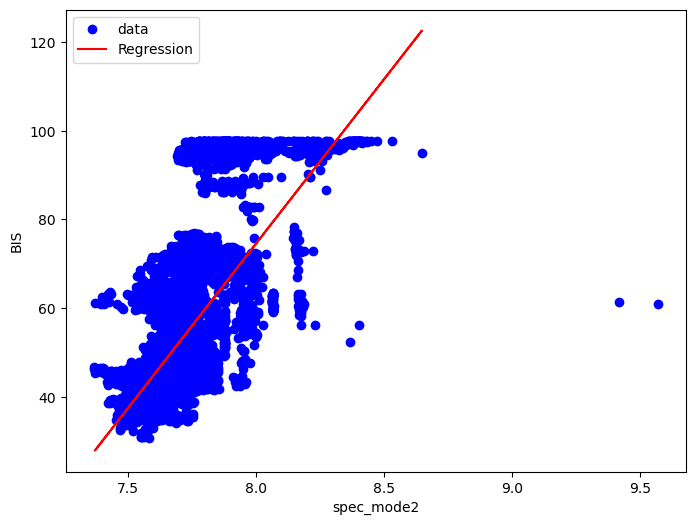

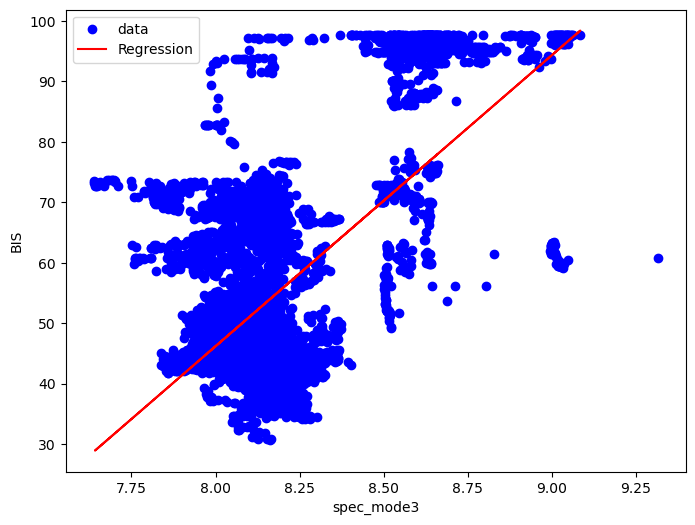

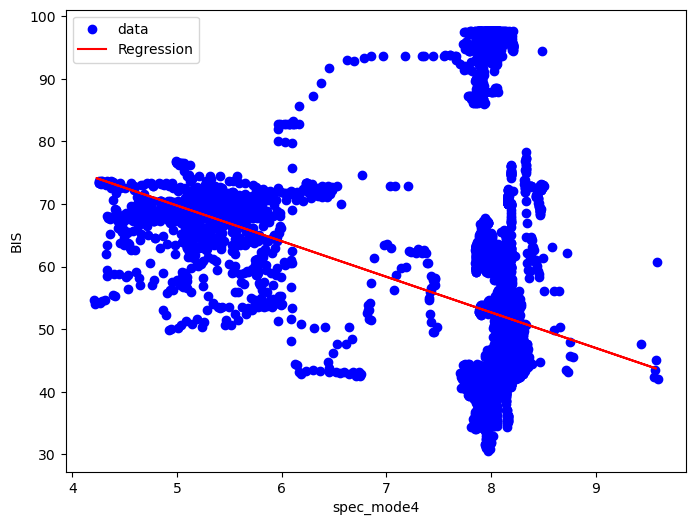

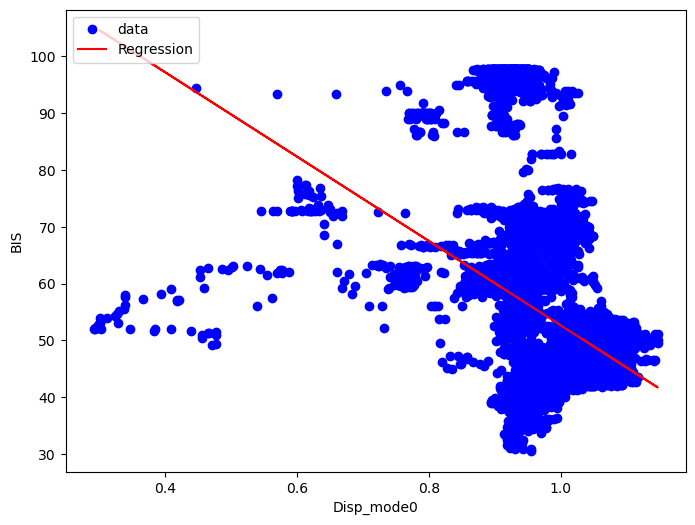

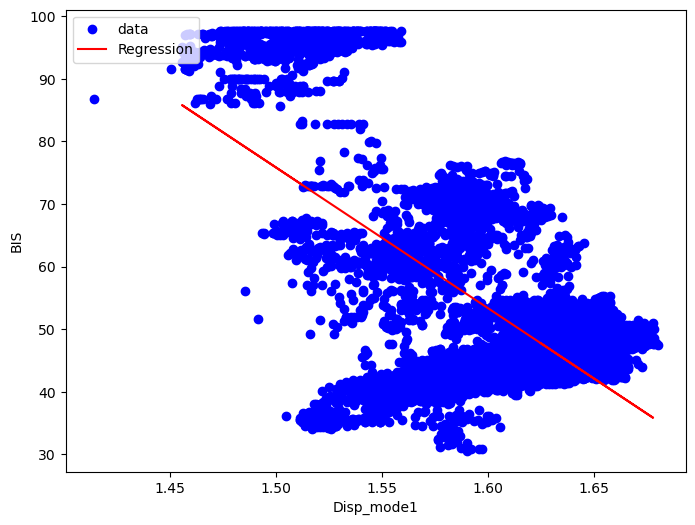

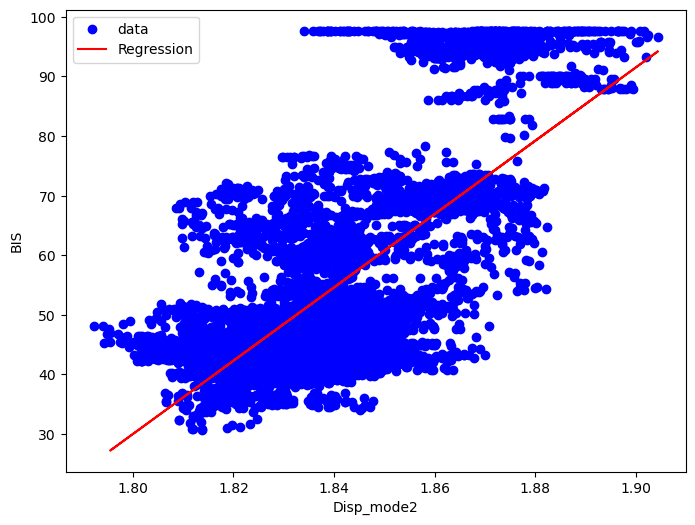

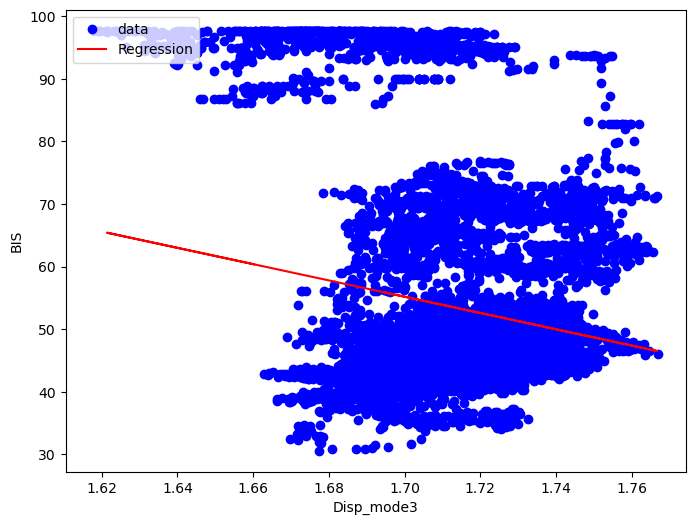

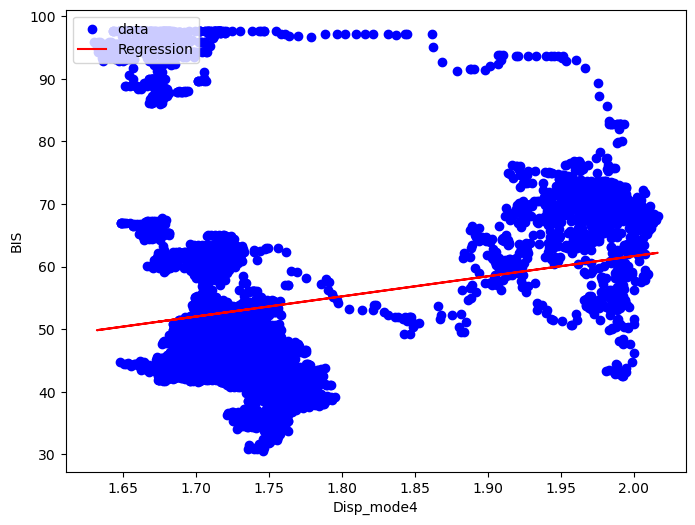

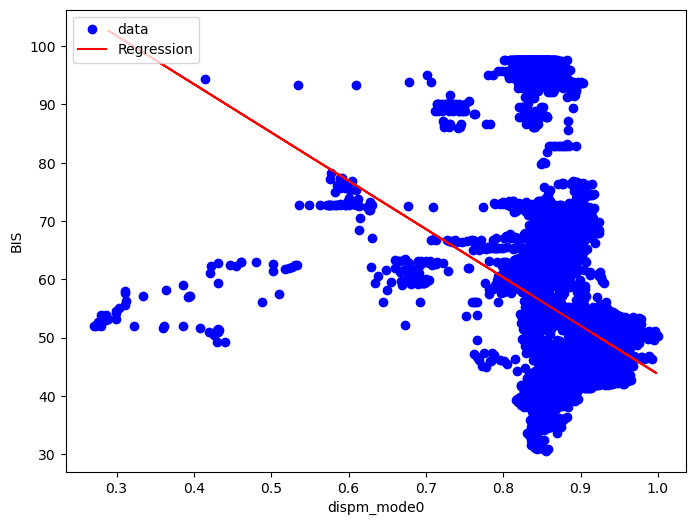

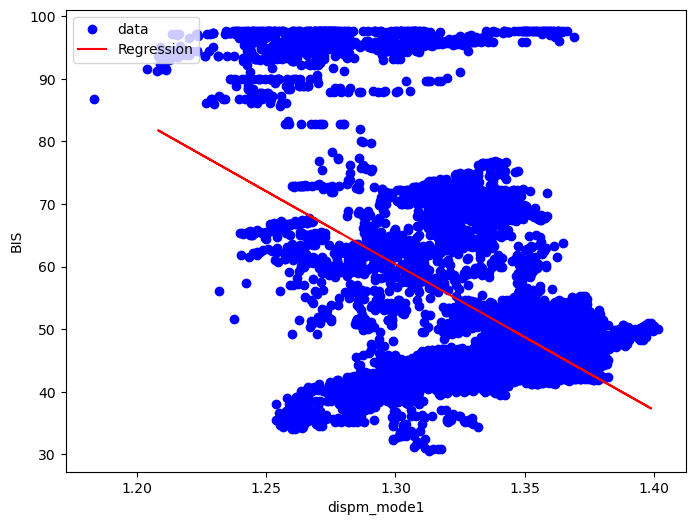

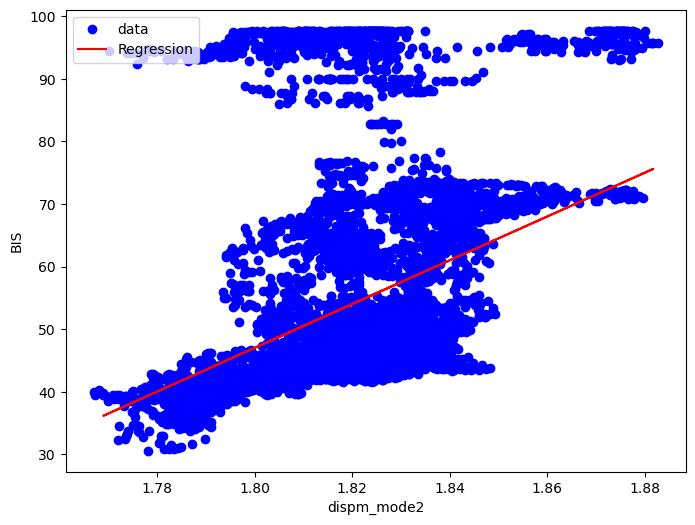

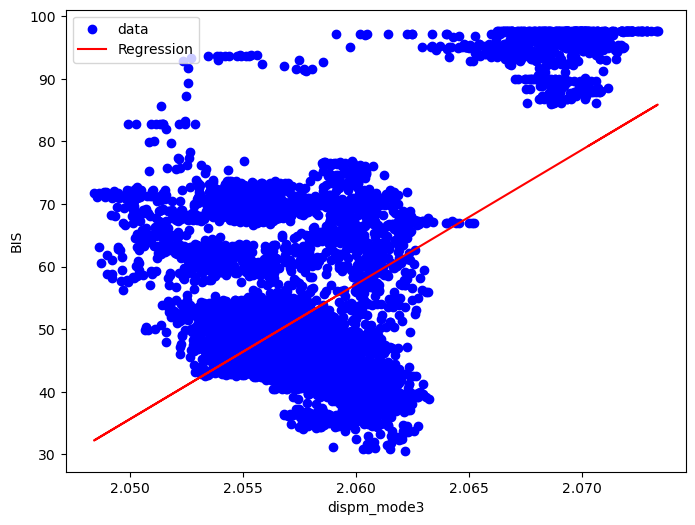

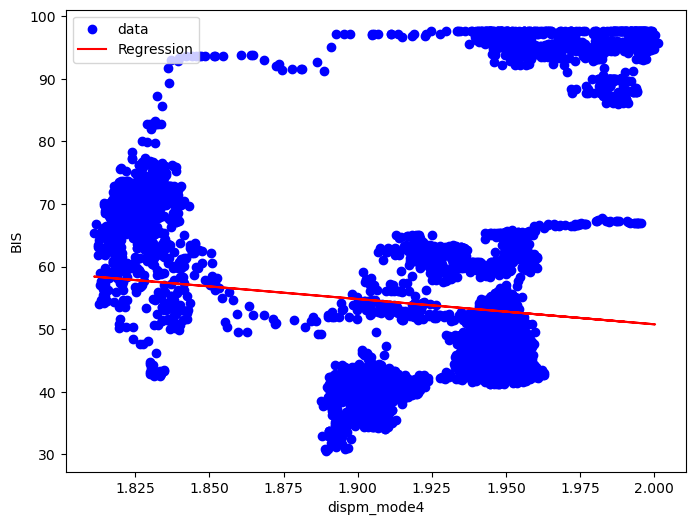

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
21,Perment_mode1_r2,79.471265
22,Perment_mode2_r2,78.237143
26,pet_mode1_r2,77.986102
34,lzc_mode4_r2,75.987110
27,pet_mode2_r2,75.451637
8,hc_mode3_r2,71.623663
7,hc_mode2_r2,65.631229
28,pet_mode3_r2,65.197702
23,Perment_mode3_r2,65.149627
38,svd_mode3_r2,63.875114


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
21  Perment_mode1    0.405306
26      pet_mode1    0.318282
34      lzc_mode4    0.157673
32      lzc_mode2    0.027432
22  Perment_mode2    0.014838
4        hm_mode4    0.009435
29      pet_mode4    0.007248
20  Perment_mode0    0.005960
7        hc_mode2    0.004887
41      hfd_mode1    0.003554
51     Disp_mode1    0.002815
16     detf_mode1    0.002500
55    dispm_mode0    0.002456
25      pet_mode0    0.002352
43      hfd_mode3    0.001933
14      kfd_mode4    0.001715
40      hfd_mode0    0.001689
37      svd_mode2    0.001683
39      svd_mode4    0.001650
31      lzc_mode1    0.001549
49     spec_mode4    0.001527
8        hc_mode3    0.001466
6        hc_mode1    0.001461
3        hm_mode3    0.001411
0        hm_mode0    0.001272
33      lzc_mode3    0.001176
35      svd_mode0    0.001164
30      lzc_mode0    0.001153
44      hfd_mode4    0.001065
24  Perment_mode4    0.000852
5        hc_mode0    0.000843
50     Disp_mode0    0.000810
47     spe